In [ ]:
%pip install opencv-python
%pip install ultralytics
%pip install numpy


In [ ]:
# segmantation for images 

import cv2
from ultralytics import YOLO
import numpy as np
import random

# Segmentation model uploading 
model = YOLO("yolov8m-seg.pt")
image = cv2.imread("path/to/image.jpg")

# taking fisrt object from results
results = model(image)[0]
# creating np-matrix of image, which put it into black-white format
mask_image = np.zeros_like(image)



# iterating mask objects from results.masks.xy to draw masks around detected images, box objects from  results.boxes to output  objects names 
for mask, box in zip(results.masks.xy, results.boxes):
    print(mask)
    # putting each mask object into np array 
    mask_array = np.array(mask, dtype=np.int32)  
    r1 = random.randint(0, 255)
    r2 = random.randint(0, 255)
    r3 = random.randint(0, 255)
    # text initializing 
    class_name = results.names[int(box.cls)]
    # applying mask_array on mask_image
    cv2.fillPoly(mask_image, [mask_array], (r1, r2, r3))  
    cv2.putText(mask_image, class_name,  (int(mask[0][0]), int(mask[0][1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

# to merge basic image and mask_image (in np form) into one single image 
masked_image = cv2.addWeighted(image, 1, mask_image, 0.5, 0)
cv2.imshow("Segmentation Mask", masked_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

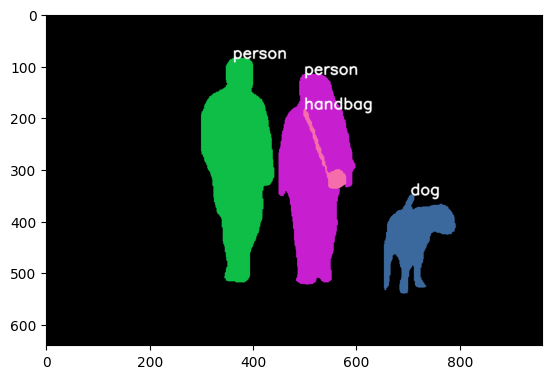

In [5]:
# masked image looks like that 
import matplotlib.pyplot as plt
plt.imshow(mask_image)

In [ ]:
%pip install opencv-python
%pip install ultralytics
%pip install numpy

import cv2
from ultralytics import YOLO
import numpy as np
import random

# Загрузка модели-сегментора
model = YOLO("yolov8m-seg.pt")
video = "path/to/your/video"

cap = cv2.VideoCapture(video)

while True:
    ret, frame = cap.read()
    if not ret:
        break

   
    results = model(frame)[0]
    # Convert each frame into an np array and store it in the mask_frame variable
    mask_frame = np.zeros_like(frame)


    # mask - a set of arrays that contains the coordinates of each point for drawing a mask in the format:

    # [748 72]
    #[746 74]
    #[740 74]
    # [738 76]
    # [734 76]
    


    # Go through each segmented object in the frame
    for mask, box in zip(results.masks.xy, results.boxes):
        # boxes and masks are results objects

        # xy is an array of masks objects that contains what was initialized as mask

        # each mask object is also converted to np format
        mask_array = np.array(mask, dtype=np.int32)  
        # set a random color for the mask
        r1 = random.randint(0, 255)
        class_name = results.names[int(box.cls)]
        # on the frame "mask_frame" in np format, create a mask mask_array with a random color
        cv2.fillPoly(mask_frame, [mask_array], (r1, r1, r1))
        cv2.putText(mask_frame, class_name.upper(),  (int(mask[0][0]), int(mask[0][1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    # Applying a mask to the original frame
    masked_frame = cv2.addWeighted(frame, 0.5, mask_frame, 0.5, 0)

    # Display frame with mask
    cv2.imshow("Segmentation Mask", masked_frame)
        
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
